In [56]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv ("BagOfWords1fixed.csv")

In [58]:
from sklearn.model_selection import train_test_split
data = data.drop (columns = ['E/I', 'F/T', 'N/S'])

max_size = data ['P/J'].value_counts ().max ()
lst = [data]
for class_index, group in data.groupby ('P/J'):
    lst.append (group.sample (max_size - len (group), replace = True))
data = pd.concat (lst)

labels = data ['P/J']
data = data.drop (['P/J'], axis = 1)



In [59]:
lst = data ['BagOfWords'].tolist ()
dataInt = []
for i in lst:
    i = i.replace ('[', '')
    i = i.replace (']', '')
    vec = []
    lstStr = i.split (', ')
    for j in lstStr:
        vec.append (int (j))
    dataInt.append (vec)

In [60]:
listData = pd.DataFrame (dataInt)

In [61]:
trainData, testData, trainLabels, testLabels = train_test_split (listData, labels, train_size = 0.8, random_state = 1)

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(1000, input_dim=10000, activation='tanh'),
    #keras.layers.Dense(100, activation='tanh'), #вот эту строчку раскомментировать
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(keras.optimizers.Adam(0.0005), 'mse', ['accuracy'])

h = model.fit (trainData, trainLabels, validation_data = (testData, testLabels), batch_size = 10, epochs = 15, verbose = True)

Epoch 1/15
839/839 [==============================] - 36s 43ms/step - loss: 0.2497 - accuracy: 0.5720 - val_loss: 0.1829 - val_accuracy: 0.7568
Epoch 2/15
839/839 [==============================] - 36s 43ms/step - loss: 0.1541 - accuracy: 0.7938 - val_loss: 0.1552 - val_accuracy: 0.7706
Epoch 3/15
839/839 [==============================] - 39s 46ms/step - loss: 0.1040 - accuracy: 0.8603 - val_loss: 0.1383 - val_accuracy: 0.8116
Epoch 4/15
839/839 [==============================] - 36s 43ms/step - loss: 0.0838 - accuracy: 0.8866 - val_loss: 0.1579 - val_accuracy: 0.7821
Epoch 5/15
839/839 [==============================] - 37s 44ms/step - loss: 0.0692 - accuracy: 0.9066 - val_loss: 0.1517 - val_accuracy: 0.7973
Epoch 6/15
839/839 [==============================] - 36s 43ms/step - loss: 0.0615 - accuracy: 0.9162 - val_loss: 0.1529 - val_accuracy: 0.8059
Epoch 7/15
839/839 [==============================] - 36s 43ms/step - loss: 0.0619 - accuracy: 0.9135 - val_loss: 0.1471 - val_accuracy:

In [63]:
#figure = plt.figure(figsize = (10, 5))
#
#histx = np.arange(0, len(h.history['loss']), 1)
#plt.plot(histx, h.history['loss'])
#plt.ylabel("loss")
#plt.xlabel("epochs")
#plt.title("Зависимость loss'а от количества эпох.")
#plt.show()
#
#figure = plt.figure(figsize = (10, 5))
#histx = np.arange(0, len(h.history['accuracy']), 1)
#plt.plot(histx, h.history['accuracy'])
#plt.ylabel("accuracy")
#plt.xlabel("epochs")
#plt.title("Зависимость точности от количества эпох.")
#plt.show()
#
#figure = plt.figure(figsize = (10, 5))
#histx = np.arange(0, len(h.history['val_accuracy']), 1)
#plt.plot(histx, h.history['val_accuracy'])
#plt.ylabel("val_accuracy")
#plt.xlabel("epochs")
#plt.title("Зависимость val_accuracy от количества эпох.")
#plt.show()

66/66 [==============================] - 1s 9ms/step
Accuracy:  0.8106819265617549
Precision:  0.7779735682819383
Recall:  0.8589494163424124
F1:  0.8164586222838649


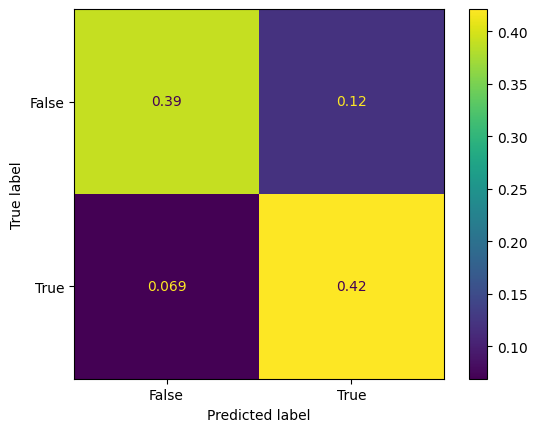

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
def showMetrics (model, data, labels):
    prediction = model.predict (data)
    preds = []
    for i in prediction:
        preds.append (i [0] >= 0.5)
    print ('Accuracy: ', accuracy_score (labels, preds))
    print ('Precision: ', precision_score (labels, preds))
    print ('Recall: ', recall_score (labels, preds))
    print ('F1: ', f1_score (labels, preds))
    ConfusionMatrixDisplay.from_predictions (labels, preds, normalize='all')
    
showMetrics (model, testData, testLabels)

In [65]:
model.summary ()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              10001000  
                                                                 
 dense_15 (Dense)            (None, 100)               100100    
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,101,201
Trainable params: 10,101,201
Non-trainable params: 0
_________________________________________________________________


In [66]:
x = 0.9650
y = 0.8603

print (2 * x * y / (x + y))

0.9096471812852681
